In [1]:

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import re ,string, csv

import tweepy # to access tweet API
from tweepy import OAuthHandler # for Authentication

from textblob import TextBlob #for Valance of Sentence(polarity)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# nltk.download('all') # Installing All from NLTK library
from nltk.corpus import stopwords # For Removing Stop words like < the , an , is ,..etc >
n_words= stopwords.words('english') #specify english stop words only
n_words.append("rt") #append rt for stop word dictionary

from nltk.tokenize import word_tokenize # for Tokenizing the sentnces as tokens
from nltk.stem.porter import PorterStemmer # converting words to their root forms ,speed and simplicity
porter = PorterStemmer() #Create stemmer obejct

from nltk.stem import WordNetLemmatizer # also converting words to their actual root forms(noun , verb ,aobjective) ,but it slow
lemmatizer = WordNetLemmatizer() #Create lemmatizer obejct

from wordcloud import WordCloud,STOPWORDS #Look at Words with highest Frequency for expression

from langdetect import detect_langs # Detect language for each tweets 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk import ngrams
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Read the data
df=pd.read_csv(r"C:\Users\ashok\fake-news\train.csv")

test=pd.read_csv(r"C:\Users\ashok\fake-news\test.csv")


In [3]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [14]:
#Get shape and head
df.head(8)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0


In [15]:
df.tail(8)

,id,title,author,text,label
20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1
20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [5]:
df = df.reset_index(drop = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='label', ylabel='count'>

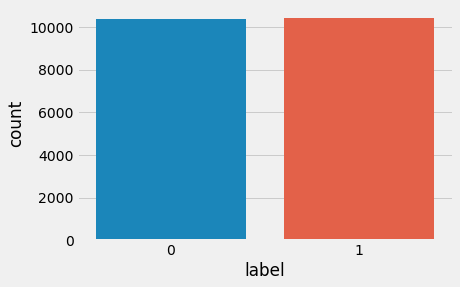

In [9]:
sns.countplot(x='label', data= df)

In [10]:
column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [11]:
# cleaning
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# remove unused columns
def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df

# impute null values with none
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

# clean_data
def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)    
    #impute null value
    df = null_process(df)
    
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [12]:
df = clean_dataset(df)
df['text'] = df.text.apply(nltk_preprocess)
df['title'] = df.title.apply(nltk_preprocess)

In [13]:
df

,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1
...,...,...,...
20795,rapper ti trump poster child white supremacy,rapper unloaded black celebrity met donald tru...,0
20796,nfl playoff schedule matchup odds new york time,green bay packer lost washington redskin week ...,0
20797,macys said receive takeover approach hudson ba...,macys today grew union several great name amer...,0
20798,nato russia hold parallel exercise balkan,nato russia hold parallel exercise balkan 1102...,1


In [14]:
def TFIDFModels(Model,txt):
    
    x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=50)
    
    vect      = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)
    
    model     = Model
    t0        = time.time()
    model.fit(train_vect, y_train)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1
    
    accuracy  = model.score(train_vect, y_train)
    predicted = model.predict(test_vect)
    
    report = classification_report(y_test, predicted, output_dict=True)
    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
    print('Positive: ', report['1'])
    print('Neutral : ', report['0'])
    print('Negative: ', report['2'])
    print('\n -------------------------------------------------------------------------------------- \n')

In [15]:
def KNN_TFIDF():
    
    x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=50)
    
    vect      = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)
    
    for k in [1,3,5,7,10]:

        model = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        t0        = time.time()
        model.fit(train_vect, y_train)
        t1        = time.time()
        predicted = model.predict(test_vect)
        t2        = time.time()
        time_train= t1-t0
        time_pred = t2-t1
        accuracy  = model.score(train_vect, y_train)
        predicted = model.predict(test_vect)

        report = classification_report(y_test, predicted, output_dict=True)

        print("Classification Report for k = {} is:\n".format(k))
        print("Training time: %fs ; Prediction time: %fs \n" % (time_train, time_pred))
        print('Accuracy score train set :', accuracy)
        print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
        print('\n -------------------------------------------------------------------------------------- \n')

In [16]:
def NgramModels(Model , txt, n):
    
    x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=50)
    
    vect      = CountVectorizer(max_features=1000 , ngram_range=(n,n))
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)
    
    model     = Model
    t0        = time.time()
    model.fit(train_vect, y_train)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1
    
    accuracy  = model.score(train_vect, y_train)
    predicted = model.predict(test_vect)
    
    report = classification_report(y_test, predicted, output_dict=True)
    print("Models with " , n , "-grams :\n")
    print('********************** \n')
    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
    print('\n --------------------------------------------------------------------------------------------------- \n')

In [17]:
def KNN_Ngram(n):
    
    x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=50)
    
    vect      = CountVectorizer(max_features=1000 , ngram_range=(n,n))
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)
    
    for k in [1,3,5,7,10]:

        model = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        t0        = time.time()
        model.fit(train_vect, y_train)
        t1        = time.time()
        predicted = model.predict(test_vect)
        t2        = time.time()
        time_train= t1-t0
        time_pred = t2-t1

        accuracy  = model.score(train_vect, y_train)
        predicted = model.predict(test_vect)
        report = classification_report(y_test, predicted, output_dict=True)

        print("Models with " , n , "-grams :\n")
        print('********************** \n')
        print("Classification Report for k = {} is:\n".format(k))
        print("Training time: %fs ; Prediction time: %fs \n" % (time_train, time_pred))
        print('Accuracy score train set :', accuracy)
        print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
        print('\n -------------------------------------------------------------------------------------- \n')

In [18]:
def TFIDFModels(Model,txt):
    
    x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=50)
    
    vect      = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)
    
    model     = Model
    t0        = time.time()
    model.fit(train_vect, y_train)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1
    
    accuracy  = model.score(train_vect, y_train)
    predicted = model.predict(test_vect)
    report = classification_report(y_test, predicted, output_dict=True)
    
    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
    
    print('\n -------------------------------------------------------------------------------------- \n')

In [19]:
SupportVectorClassifier=svm.SVC(kernel='linear')

LogReg2=NgramModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ', n=2)
LogReg3=NgramModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ', n=3)

svm2=NgramModels(Model=SupportVectorClassifier ,txt='Support Vectoer Classifier Model : \n ', n=2)
svm3=NgramModels(Model=SupportVectorClassifier ,txt='Support Vectoer Classifier Model : \n ', n=3)

DecTree2=NgramModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ', n=2)
DecTree3=NgramModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ', n=3)

KNN2=KNN_Ngram(2)
KNN3=KNN_Ngram(3)

Models with  2 -grams :

********************** 

Logistic Regression Model : 
 
Training time: 0.618074s; Prediction time: 0.001001s 

Accuracy score train set : 0.9255408653846153
Accuracy score test set  : 0.8961538461538462 


 --------------------------------------------------------------------------------------------------- 

Models with  3 -grams :

********************** 

Logistic Regression Model : 
 
Training time: 0.273021s; Prediction time: 0.000000s 

Accuracy score train set : 0.8530048076923077
Accuracy score test set  : 0.8483173076923077 


 --------------------------------------------------------------------------------------------------- 

Models with  2 -grams :

********************** 

Support Vectoer Classifier Model : 
 
Training time: 57.865813s; Prediction time: 1.903791s 

Accuracy score train set : 0.9293870192307693
Accuracy score test set  : 0.89375 


 --------------------------------------------------------------------------------------------------- 

M

In [20]:
SupportVectorClassifier=svm.SVC(kernel='linear')

print('Models with Tfidf Feature extraction Techniques : \n')
print('************************************************ \n')

LogReg=TFIDFModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ')
svm=TFIDFModels(Model=SupportVectorClassifier,txt='Support Vector Classifier Model : \n ')
DecTree=TFIDFModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ')
knn_tfidf=KNN_TFIDF()

Models with Tfidf Feature extraction Techniques : 

************************************************ 

Logistic Regression Model : 
 
Training time: 5.912589s; Prediction time: 0.009006s 

Accuracy score train set : 0.9795673076923077
Accuracy score test set  : 0.9651442307692307 


 -------------------------------------------------------------------------------------- 

Support Vector Classifier Model : 
 
Training time: 515.401899s; Prediction time: 83.756636s 

Accuracy score train set : 0.996875
Accuracy score test set  : 0.971875 


 -------------------------------------------------------------------------------------- 

Decision Tree Classifier Model : 
 
Training time: 57.025169s; Prediction time: 0.053008s 

Accuracy score train set : 1.0
Accuracy score test set  : 0.8899038461538461 


 -------------------------------------------------------------------------------------- 

Classification Report for k = 1 is:

Training time: 0.020001s ; Prediction time: 22.180738s 

Accuracy s

In [21]:
x_train, y_train= df['text'], df['label']

In [22]:
n=2

In [23]:
vect= CountVectorizer(max_features=1000 , ngram_range=(n,n))
vct= vect.fit(x_train)

In [24]:
train_vect=vct.transform(x_train)

In [27]:
test.text=test.text.astype(str)

In [31]:
test_vect = vct.transform(test.text)

In [32]:
train_vect

<20800x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 322418 stored elements in Compressed Sparse Row format>

In [33]:
test_vect

<5200x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 53716 stored elements in Compressed Sparse Row format>

In [34]:
model     = LogisticRegression()
model.fit(train_vect, y_train)
predicted = model.predict(test_vect)
predicted

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_vect,y_train)   
y_pred=rf_model.predict_proba(test_vect)

In [52]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = rf_model.predict_proba(train_vect) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_train, predicted))
    if roc_score<roc_auc_score(y_train, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_train, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.9786271300664292
Threshold 0.25 -- 0.9950418792721671
Threshold 0.3 -- 0.9988928468277655
Threshold 0.35 -- 0.99971117743333
Threshold 0.39999999999999997 -- 0.999951862905555
Threshold 0.44999999999999996 -- 0.999951862905555
Threshold 0.49999999999999994 -- 0.999951862905555
Threshold 0.5499999999999999 -- 0.999951862905555
Threshold 0.6 -- 0.999951862905555
Threshold 0.65 -- 0.9999038460036056
Threshold 0.7000000000000001 -- 0.9986073896509695
Threshold 0.7500000000000001 -- 0.9910207191429506
---Optimum Threshold --- 0.39999999999999997 --ROC-- 0.999951862905555


In [53]:
y_pred

array([[0.73, 0.27],
       [0.2 , 0.8 ],
       [0.47, 0.53],
       ...,
       [0.93, 0.07],
       [0.27, 0.73],
       [0.65, 0.35]])

In [54]:
len(y_pred)

5200

In [55]:
y_pred = y_pred[:, 1]

In [56]:
lol1=[]

for i in range(len(y_pred)):
    if y_pred[i]>=0.39999999999999997:
        lol1.append(1)
    else:
        lol1.append(0)

In [57]:
lol1=pd.DataFrame(lol1)

In [58]:
lol1

,0
0,0
1,1
2,1
3,0
4,1
...,...
5195,0
5196,0
5197,0
5198,1
